# Practice Exercise: Cleaning data & Transforming columns/features

## Context:
- The data is based on real anonymized Czech bank transactions and account info.
- We'll be focusing on practicing the data cleaning, columns transformations, and other techniques that we've learned in the course.
- But here is the original task description of the dataset publishers:

*The bank wants to improve their services. For instance, the bank managers have only vague idea, who is a good client (whom to offer some additional services)   and who is a bad client (whom to watch carefully to minimize the bank losses). Fortunately, the bank stores data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued. The bank managers hope to improve their understanding of customers and seek specific actions to improve services.*



## Dataset Description:

We'll work on three datasets (in three separate csv files):

  - **account**: each record describes static characteristics of an account
  - **transaction**: each record describes one transaction on an account
  - **district**: each record describes demographic characteristics of a district
  
In reality, the organizations like banks often have data stored in multiple datasets. Assume we want to study the transactional level data, we'll need to combine these three datasets together to have transactions data with account and district data.

## Objective:
   - Examine/clean the individual dataset
   - Combine them into a single dataset, which is subject to more cleaning
   - Create new columns based on existing columns

By the end, the new dataset is ready for more analysis.

### 1. Import the libraries

In [74]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt


### 2. Import the data from three csv files as DataFrames `account`, `district`, `trans`
Hint:
- the `read_csv` function can automatically infer and load zip file, read its documentation of parameter `compression` if you are interested in details
- you may ignore the warning when reading the `trans.csv.zip` file. It is optional to follow the warning instructions to remove it.

In [7]:
drive.mount('/content/gdrive')
account_path = '/content/gdrive/MyDrive/Colab Notebooks/assets/account.csv'
district_path = '/content/gdrive/MyDrive/Colab Notebooks/assets/district.csv'
trans_path = '/content/gdrive/MyDrive/Colab Notebooks/assets/trans.csv'
account = pd.read_csv(account_path)
district = pd.read_csv(district_path)
trans = pd.read_csv(trans_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-7-4c245749c9e5>:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans = pd.read_csv(trans_path)


### 3. Look at the info summary, head of each DataFrame

In [17]:
account.info()
account.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account_id         4500 non-null   int64 
 1   district_id        4500 non-null   int64 
 2   frequency          4500 non-null   object
 3   account_open_date  4500 non-null   object
 4   client_id          4500 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 175.9+ KB


,account_id,district_id,frequency,account_open_date,client_id
0,576,55,MONTHLY STATEMENTS,1993-01-01,692
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601
2,704,55,MONTHLY STATEMENTS,1993-01-01,844
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177


In [18]:
district.info()
district.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district_id           76 non-null     int64  
 1   district_name         76 non-null     object 
 2   region                76 non-null     object 
 3   population            76 non-null     int64  
 4   average_salary        66 non-null     float64
 5   unemployment_rate     66 non-null     float64
 6   num_committed_crimes  67 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 4.3+ KB


,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953,12541.0,0.43,99107.0
1,2,Benesov,central Bohemia,88884,NaN,NaN,2674.0
2,3,Beroun,central Bohemia,75232,8980.0,2.21,2813.0
3,4,Kladno,central Bohemia,149893,9753.0,5.05,NaN
4,5,Kolin,central Bohemia,95616,9307.0,4.43,NaN


In [19]:
trans.info()
trans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   trans_id         1056320 non-null  int64  
 1   account_id       1056320 non-null  int64  
 2   date             1056320 non-null  object 
 3   type             1056320 non-null  object 
 4   operation_type   873206 non-null   object 
 5   amount           1056320 non-null  float64
 6   balance          1056320 non-null  float64
 7   description      574439 non-null   object 
 8   partner_bank     273508 non-null   object 
 9   partner_account  295389 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 80.6+ MB


,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,NaN,NaN,NaN
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,NaN,NaN
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,NaN,NaN,NaN
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,NaN,NaN,NaN


### 4. Check for the unique values and their counts in each column for the three DataFrames

In [21]:
account.nunique()

account_id           4500
district_id            77
frequency               3
account_open_date    1535
client_id            4500
dtype: int64

In [22]:
district.nunique()

district_id             76
district_name           76
region                   8
population              76
average_salary          65
unemployment_rate       63
num_committed_crimes    66
dtype: int64

In [23]:
trans.nunique()

trans_id           1056320
account_id            4500
date                  2191
type                     2
operation_type           5
amount               40400
balance             542739
description              8
partner_bank            13
partner_account       7665
dtype: int64

### 5. Check for duplicates in the three DataFrames

In [29]:
account_duplicates = account.duplicated()
print("Number of duplicates in Account are : " , account_duplicates.sum())


Number of duplicates in Account are :  0


In [28]:
district_duplicates = district.duplicated()
print("Number of duplicates in District are : " , district_duplicates.sum())

Number of duplicates in District are :  0


In [30]:
trans_duplicates = trans.duplicated()
print("Number of duplicates in Trans are : " , trans_duplicates.sum())

Number of duplicates in Trans are :  0


### 6. Convert column `account_open_date` in `account` and column `date` in `trans` into datetime dtypes

In [32]:
account["account_open_date"] = pd.to_datetime(account["account_open_date"])
trans['date'] = pd.to_datetime(trans['date'])
print(account["account_open_date"] , trans['date'])

0      1993-01-01
1      1993-01-01
2      1993-01-01
3      1993-01-01
4      1993-01-02
          ...    
4495   1997-12-28
4496   1997-12-28
4497   1997-12-28
4498   1997-12-29
4499   1997-12-29
Name: account_open_date, Length: 4500, dtype: datetime64[ns] 0         1993-01-01
1         1993-01-01
2         1993-01-01
3         1993-01-01
4         1993-01-02
             ...    
1056315   1998-12-31
1056316   1998-12-31
1056317   1998-12-31
1056318   1998-12-31
1056319   1998-12-31
Name: date, Length: 1056320, dtype: datetime64[ns]


### 7. Convert the columns `region` and `district_name` in `district` to all uppercase

In [34]:
district['region'] = district['region'].str.upper()
district['district_name'] = district['district_name'].str.upper()
print(district['region'],district['district_name'])

0              PRAGUE
1     CENTRAL BOHEMIA
2     CENTRAL BOHEMIA
3     CENTRAL BOHEMIA
4     CENTRAL BOHEMIA
           ...       
71      NORTH MORAVIA
72      NORTH MORAVIA
73      NORTH MORAVIA
74      NORTH MORAVIA
75      NORTH MORAVIA
Name: region, Length: 76, dtype: object 0         HL.M. PRAHA
1             BENESOV
2              BEROUN
3              KLADNO
4               KOLIN
           ...       
71            OLOMOUC
72              OPAVA
73    OSTRAVA - MESTO
74             PREROV
75            SUMPERK
Name: district_name, Length: 76, dtype: object


### 8. Check for missing data by columns in `account` using the `isna` method

In [36]:
account_missing_values = account.isna().sum()
print(account_missing_values)

account_id           0
district_id          0
frequency            0
account_open_date    0
client_id            0
dtype: int64


### 9. Check for missing data by columns in `district` using the `isna` method

In [38]:
district_missing_values = district.isna().sum()
print(district_missing_values)

district_id              0
district_name            0
region                   0
population               0
average_salary          10
unemployment_rate       10
num_committed_crimes     9
dtype: int64


`district` has numeric features that could have relationships with each other. Let's use iterative imputation on them.

#### Use `IterativeImputer` in `sklearn` to impute based on columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`

##### Import libraries

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


##### Build a list of columns that will be used for imputation, which are `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`
These are the columns that might be related to each other

In [48]:
impute_cols = ['population' , 'average_salary' , 'unemployment_rate' , 'num_committed_crimes']

##### Create `IterativeImputer` object and set its `min_value` and `max_value` parameters to be the minumum and maximum of corresponding columns

In [49]:
min_values = district[impute_cols].min(axis=0).to_numpy().tolist()
max_values = district[impute_cols].max(axis=0).to_numpy().tolist()

imputer = IterativeImputer(min_value=min_values, max_value=max_values)


##### Apply the imputer to fit and transform the columns to an imputed NumPy array

In [52]:
imputed_data = imputer.fit_transform(district[impute_cols].to_numpy())
print(imputed_data)

[[ 1.20495300e+06  1.25410000e+04  4.30000000e-01  9.91070000e+04]
 [ 8.88840000e+04  8.81410698e+03  3.71525816e+00  2.67400000e+03]
 [ 7.52320000e+04  8.98000000e+03  2.21000000e+00  2.81300000e+03]
 [ 1.49893000e+05  9.75300000e+03  5.05000000e+00  6.31247188e+03]
 [ 9.56160000e+04  9.30700000e+03  4.43000000e+00  1.92027865e+03]
 [ 7.79630000e+04  8.54600000e+03  4.02000000e+00  3.12000000e+03]
 [ 9.47250000e+04  8.83630372e+03  2.87000000e+00  4.84600000e+03]
 [ 1.12065000e+05  8.90190233e+03  1.44000000e+00  4.98700000e+03]
 [ 8.13440000e+04  8.89900000e+03  3.97000000e+00  2.48700000e+03]
 [ 9.20840000e+04  1.01240000e+04  5.40000000e-01  1.63065808e+03]
 [ 7.56370000e+04  9.62200000e+03  3.84986752e+00  3.52900000e+03]
 [ 1.07870000e+05  8.75400000e+03  4.31000000e+00  3.86800000e+03]
 [ 5.39210000e+04  8.68181499e+03  3.26000000e+00  1.87500000e+03]
 [ 1.77686000e+05  1.00450000e+04  1.71000000e+00  6.29500000e+03]
 [ 5.87960000e+04  8.70025583e+03  3.60000000e+00  1.87900000e

##### Assign the imputed array back to the original DataFrame's columns

In [53]:
district[impute_cols] = imputed_data

##### Double check that the columns are imputed

In [56]:
missing_values = district.isna().sum()
print(missing_values)

district_id             0
district_name           0
region                  0
population              0
average_salary          0
unemployment_rate       0
num_committed_crimes    0
dtype: int64


### 10. Check for missing data by columns in `trans` using the `isna` method

In [58]:
trans_missing_values = trans.isna().sum()
print(trans_missing_values)

trans_id                0
account_id              0
date                    0
type                    0
operation_type     183114
amount                  0
balance                 0
description        481881
partner_bank       782812
partner_account    760931
dtype: int64


#### Divide the columns into numeric columns and categorical columns, then use the `fillna` method to fill numeric columns with -999, fill categorical columns with 'UNKNOWN'

In [73]:
numeric_cols = trans.select_dtypes(include=['number'])
categorical_cols = trans.select_dtypes(include=['object'])

for col in numeric_cols:
  trans[col] = trans[col].fillna(-999)
for col in categorical_cols:
  trans[col] = trans[col].fillna('UNKNOWN')

0          CREDIT
1          CREDIT
2          CREDIT
3          CREDIT
4          CREDIT
            ...  
1056315    CREDIT
1056316    CREDIT
1056317    CREDIT
1056318    CREDIT
1056319    CREDIT
Name: type, Length: 1056320, dtype: object
0          CREDIT IN CASH
1          CREDIT IN CASH
2          CREDIT IN CASH
3          CREDIT IN CASH
4          CREDIT IN CASH
                ...      
1056315           UNKNOWN
1056316           UNKNOWN
1056317           UNKNOWN
1056318           UNKNOWN
1056319           UNKNOWN
Name: operation_type, Length: 1056320, dtype: object
0                  UNKNOWN
1                  UNKNOWN
2                  UNKNOWN
3                  UNKNOWN
4                  UNKNOWN
                ...       
1056315    INTEREST CREDIT
1056316    INTEREST CREDIT
1056317    INTEREST CREDIT
1056318    INTEREST CREDIT
1056319    INTEREST CREDIT
Name: description, Length: 1056320, dtype: object
0          UNKNOWN
1          UNKNOWN
2          UNKNOWN
3          UNKNO

### 11. Check for outliers in `district` using the `describe` method, then look at the histograms of the suspicious columns

In [75]:
descriptive_stats = district.describe()
print(descriptive_stats)

       district_id    population  average_salary  unemployment_rate  \
count    76.000000  7.600000e+01       76.000000          76.000000   
mean     38.500000  1.336920e+05     8983.711554           3.864244   
std      22.083176  1.378127e+05      740.937369           1.724144   
min       1.000000  4.282100e+04     8110.000000           0.430000   
25%      19.750000  8.472500e+04     8533.750000           2.650000   
50%      38.500000  1.083910e+05     8793.000000           3.738348   
75%      57.250000  1.382770e+05     9280.750000           4.570000   
max      76.000000  1.204953e+06    12541.000000           9.400000   

       num_committed_crimes  
count             76.000000  
mean            5004.318838  
std            11417.061197  
min            -2348.839613  
25%             1918.458990  
50%             2864.000000  
75%             4562.416575  
max            99107.000000  


#### Explore the outliers in the dataset

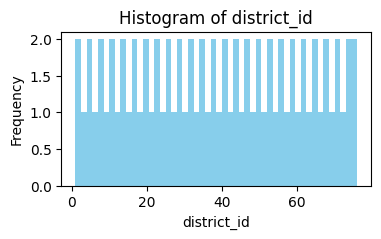

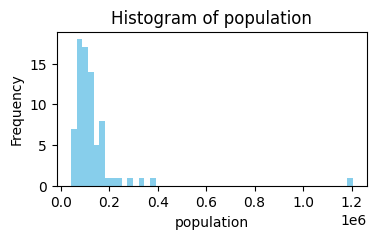

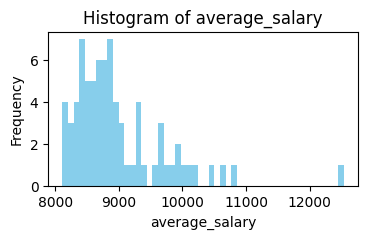

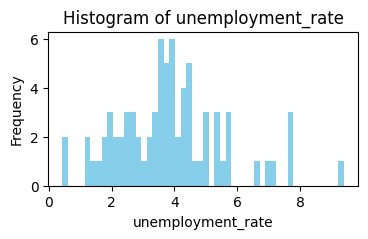

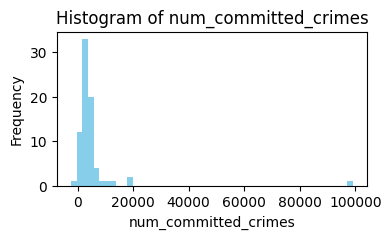

In [88]:
district_cols = ['district_id', 'population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']
for column in district_cols:
    plt.figure(figsize=(4, 2))
    plt.hist(district[column],color='skyblue', bins=50)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### 12. Check for outliers in `trans` using the `describe` method, then look at the histograms of the suspicious columns

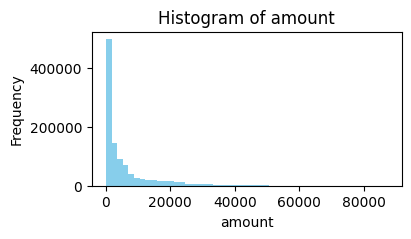

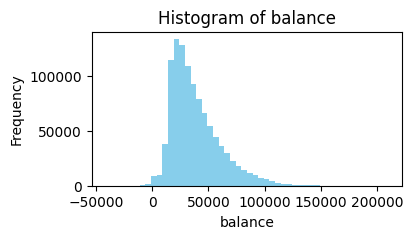

In [92]:
trans.describe()

trans_cols = ['amount', 'balance']
for column in trans_cols:
    plt.figure(figsize=(4, 2))
    plt.hist(trans[column],color='skyblue', bins=50)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### Explore the outliers in the dataset

In [93]:
trans[trans['amount'] > 60000]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
422,1313408,4484,1993-02-23,DEBIT,WITHDRAWAL IN CASH,62100.0,41183.0,UNKNOWN,UNKNOWN,-999.0
1287,1450519,4937,1993-04-04,DEBIT,WITHDRAWAL IN CASH,60500.0,74071.2,UNKNOWN,UNKNOWN,-999.0
3565,303136,1032,1993-06-05,CREDIT,COLLECTION FROM ANOTHER BANK,74648.0,112843.8,UNKNOWN,GH,43027007.0
3635,655858,2242,1993-06-06,CREDIT,COLLECTION FROM ANOTHER BANK,65240.0,126832.2,UNKNOWN,CD,7862908.0
3783,894506,3050,1993-06-08,CREDIT,COLLECTION FROM ANOTHER BANK,62168.0,73568.0,UNKNOWN,GH,69871258.0
...,...,...,...,...,...,...,...,...,...,...
1049226,602639,2051,1998-12-21,DEBIT,WITHDRAWAL IN CASH,62000.0,71187.7,UNKNOWN,UNKNOWN,-999.0
1049504,302367,1029,1998-12-22,DEBIT,WITHDRAWAL IN CASH,63800.0,57501.1,UNKNOWN,UNKNOWN,-999.0
1049791,335369,1139,1998-12-23,DEBIT,WITHDRAWAL IN CASH,62600.0,90537.9,UNKNOWN,UNKNOWN,-999.0
1050834,414144,1407,1998-12-26,DEBIT,WITHDRAWAL IN CASH,62700.0,73836.1,UNKNOWN,UNKNOWN,-999.0


The DataFrame `account` doesn't have any columns that could have outliers, so we are not exploring it.

### 13. Merge (left join) `account` and `district` into a new DataFrame called `account_district` using their common columns

In [94]:
account_district = pd.merge(left=account, right=district, on='district_id', how='left')


### 14. Check the information summary of `account_district`, any missing data?

In [95]:
print("Information summary of 'account_district':")
print(account_district.info())

Information summary of 'account_district':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   account_id            4500 non-null   int64         
 1   district_id           4500 non-null   int64         
 2   frequency             4500 non-null   object        
 3   account_open_date     4500 non-null   datetime64[ns]
 4   client_id             4500 non-null   int64         
 5   district_name         4460 non-null   object        
 6   region                4460 non-null   object        
 7   population            4460 non-null   float64       
 8   average_salary        4460 non-null   float64       
 9   unemployment_rate     4460 non-null   float64       
 10  num_committed_crimes  4460 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 421.9+ KB
None


#### Look at the rows with missing data in `account_district`

In [96]:
missing_values = account_district.isna().sum()
print("Missing values in 'account_district':")
print(missing_values)

Missing values in 'account_district':
account_id               0
district_id              0
frequency                0
account_open_date        0
client_id                0
district_name           40
region                  40
population              40
average_salary          40
unemployment_rate       40
num_committed_crimes    40
dtype: int64


#### Use `SimpleImputer` from `sklearn` to impute the missing data in columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes` with their means

In [98]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
cols_to_impute = ['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']
account_district[cols_to_impute] = imp_mean.fit_transform(account_district[cols_to_impute])

#### Use `fillna` method to impute the missing data in columns `district_name` and `region` with 'UNKNOWN'

In [99]:
account_district = account_district.fillna('UNKNOWN')

### 15. Merge (left join) `trans` and `account_district` into a new DataFrame called `all_data` using their common columns

In [97]:
all_data = pd.merge(df_trans, account_district, on='account_id', how='left')

#### Check the information summary of `all_data`

In [100]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 0 to 1056319
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   trans_id              1056320 non-null  int64         
 1   account_id            1056320 non-null  int64         
 2   date                  1056320 non-null  datetime64[ns]
 3   type                  1056320 non-null  object        
 4   operation_type        1056320 non-null  object        
 5   amount                1056320 non-null  float64       
 6   balance               1056320 non-null  float64       
 7   description           1056320 non-null  object        
 8   partner_bank          1056320 non-null  object        
 9   partner_account       1056320 non-null  float64       
 10  district_id           1056320 non-null  int64         
 11  frequency             1056320 non-null  object        
 12  account_open_date     1056320 non-null  da

### 16. Create a new column `account_open_year` and assign it as the year from column `account_open_date`

In [101]:
all_data['account_open_year'] = pd.to_datetime(all_data['account_open_date']).dt.year

### 17. Calculate the difference between columns `date` (transaction date) and `account_open_date`

In [102]:
all_data['date_diff'] = pd.to_datetime(all_data['date']) - pd.to_datetime(all_data['account_open_date'])

### 18. Create a new column `account_age_days` and assign it as the difference in days between columns `date` (transaction date) and `account_open_date`

In [103]:
all_data['account_age_days'] = all_data['date_diff'].dt.days

### 19. Create a new column `amount_category` by cutting the column `amount` into 3 equal-sized bins, and label the bins as 'low_amount', 'medium_amount', 'high_amount'

In [104]:
bins = pd.qcut(all_data['amount'], 3, labels=['low_amount', 'medium_amount', 'high_amount'])
all_data['amount_category'] = bins

#### Verify the categories and their counts in `amount_category`

In [105]:
print("Amount category counts:")
print(all_data['amount_category'].value_counts())

Amount category counts:
medium_amount    352394
low_amount       352118
high_amount      351808
Name: amount_category, dtype: int64


### 20. Create a new column `account_age_days_category` by cutting the column `account_age_days` into 5 equal-width bins

In [107]:
all_data['account_age_days_category'] = pd.cut(all_data['account_age_days'], bins=5)

#### Verify the categories and their counts in `account_age_days_category`

In [108]:
print("Account age days category counts:")
print(all_data['account_age_days_category'].value_counts())

Account age days category counts:
(438.0, 876.0]      333012
(-2.19, 438.0]      330815
(876.0, 1314.0]     204014
(1314.0, 1752.0]    131926
(1752.0, 2190.0]     56553
Name: account_age_days_category, dtype: int64


#### Print out the first 20 rows of `all_data` to look at the newly added columns

In [109]:
print("First 20 rows of 'all_data':")
print(all_data.head(20))

First 20 rows of 'all_data':
    trans_id  account_id       date    type                operation_type  \
0     695247        2378 1993-01-01  CREDIT                CREDIT IN CASH   
1     171812         576 1993-01-01  CREDIT                CREDIT IN CASH   
2     207264         704 1993-01-01  CREDIT                CREDIT IN CASH   
3    1117247        3818 1993-01-01  CREDIT                CREDIT IN CASH   
4     579373        1972 1993-01-02  CREDIT                CREDIT IN CASH   
5     771035        2632 1993-01-02  CREDIT                CREDIT IN CASH   
6     452728        1539 1993-01-03  CREDIT                CREDIT IN CASH   
7     725751        2484 1993-01-03  CREDIT                CREDIT IN CASH   
8     497211        1695 1993-01-03  CREDIT                CREDIT IN CASH   
9     232960         793 1993-01-03  CREDIT                CREDIT IN CASH   
10    505240        1726 1993-01-03  CREDIT                CREDIT IN CASH   
11    144541         485 1993-01-04  CREDIT    